# KNN-Based Modeling

**Outline**
* [K-Nearest Neighbors](#knn)
* [Local Polynomial Regression](#local)
    * Local Weighted Average
    * Local Linear
    * Local Quadratic
* [Example](#example)    
* [Reference](#refer)
    

---

## <a id='knn'>K-Nearest Neighbors</a>

> **Idea**

K-Nearest Neighbor(KNN) based model are a set of generic nonlinear modeling tool that is extremely flexible. The idea of these methods are perhaps the simplest comparing to other methods. We can somehow guess from the name of the method to know what the alrogithm is trying to do.

Assume we have a set of training data {$y_i, x_i: i=1,2,\dots,n$}. For 1-Nearest Neighbors, to predict $Y$ for a new case with predictos $x$:
* find the $x_i$ in the training set that is the closest neighbor to $x$
* then take the predicted $Y$ to be the response value for that training observation

This is basically what KNN is. Instead of using only 1 nearest neighbor, it uses K nearest neighbor to make the predictions.

> **Pros and Cons**

* Pros
    * The most flexible of all. It can represent any nonlinear relationship.
    * Easy to use. No model fittign required.
* Cons
    * Not suitable for interpretation or explanatory purposes, since there is no real fitted model.
    * Need to retain all the training data to make predictions.
    * With large $k$(the number of predictors), we need very large $n$(number of observations), because neighbors get furhter away in higher dimensions.
    * For most supervised learning methods, large n increases the computational expense for training, but not for new case prediction. Large n is more problematic for nearest neighbors, because the "training" occurs for every new case prediction 
    * With very large n, we need computational tricks (e.g. tree-based methods) to efficiently search for nearest neighbors.
    * Not well suited for categorical predictors


## <a id='local'>Local Polynomial Regression</a>

KNN gives the same weight to all the nearest neighbors. Intuitively, we might want to give a higher weight to the observations that is nearer to the new observation that we want to make a prediction on. This is basically the idea of 
local polynomial regression.

### Local weighted average

> **Idea**

To further enhance KNN, we apply some functions according to the distance between the new and original observations. The idea is that the nearer the original observation to the new point, the higher weight we want to use when making a prediction. We call these kind of functions ***Kernel Weighting Functions***. 

> **Kernel Weighting Function**

Three common types of kernel functions are shown in the figure below
<img src="_pic/kernel.png" style="width: 600px;height: 400px;"/>


We can see that for Gaussian kernel function, it smooth out when the distance is further away; while for TRi-cube and Epanechnikov kernel function, it doesn't have any weight for the points that is out of the [-1, 1] range. The trade of between choosing the Gaussian and the other two is *computational expenses*. Gaussian kernel fucntion intuitively makes more sense but it is computational more expense. It'll take more data into account for calculating their average for prediction.

> **Comparision of KNN and Kernel Weighting Average for sparse data**

For sparse data, KNN method will be suffering from higher bias and lower variance, since the local window will try to average the result even if the nearest data point is somehow further away.

While for local weighted average, it will have a lower bias but higher variance, since the width of the local window is fixe and it will hence generate a more complex model.

### Local Linear Regression

> **Idea**

A problem with both KNN and Local weighted average KNN is that they can have severe bias at the boundaries of the $x$-domain. In other words, if an observation lies on the boundary, it only have neighbors in one side, and making a prediction for these kinds of observation only depending on only one side of nearest neighbors can cause severe bias. An illustration of boundary bias is shown in the figure below

<img src="_pic/boundary_bias.png" style="width: 600px;height: 400px;"/>


The is where local linear regression come into play. Instead of using a local average for the predictor, it fit a local linear regression model.To prediction $Y$ at specific $x$, fit a linear regression that minimize the kernel weighted cost and use the coefficient obtained from minimizing that cost function to make a prediction for the new point. More specifically:

$$\hat{\beta}(x) = argmin_{\beta}\sum_{i=1}^{n} K_{\lambda}(x, x_i)\Big[y_i-\hat{y_i} \Big]^2$$

where 

$$\hat{y_i} = \beta_0+\beta_1 x_{i,1}$$

Noted that we are only interested in using the K nearest point to fit a linear regression. Even though in the above equation we sum up the cost for all the observations in the data, the kernel weighting function will only have weights for those which are near to the new points. To make prediction, i.e., to know what response value should the new point should have:

$$\hat{y}(x) = \hat{\beta}_0+\hat{\beta_1} x_{1}$$

For each $x$ at which we want to predict $Y$, we must refit the model and minimze the above weighted SSE, which will give a different set of coefficients $\hat{\beta}(x)$ for __every__ $x$.

If we have k features instead of 1 feature, the above equation will become

$$\hat{y_i} = \beta_0+\beta_1 x_{i,1}+ \dots + \beta_k x_{i,k}$$

$$\hat{y}(x) = \hat{\beta}_0+\hat{\beta_1} x_{1}+\dots+\hat{\beta_k} x_{k}$$

### Local Quadratic Regression

> **Idea**

Local linear regression may help us solve the boundary bias. Since it fit a straight line in local region, it'll introduce bias in the peak and valley. To address this bias, intuitively, if we can fit a curve instead of a straight line, we can lower the bias further. This is basically what local quaratic regression is.

Instead of fitting a local linear regression, we can fit a local quadratic regression. An illustration is also shown in the figure below:

<img src="_pic/linear_quadratic.png" style="width: 600px;height: 400px;"/>


Noted that if we have k=20 predictors, when we count all the interaction terms of all pairs of predictors, we will need $C_{2}^{20}= \frac{20\times19}{2}$ predictors for a local quadratic regression. For each observation, the local window needs at least around 200 data points, aka 200 nearest neighbors.

> **The pros and cons of local linear vs quadratic regression**

* local quadratic regression
    * Pros: 
        * reducing bias, especially in the valley and peak
    * Cons
        * since the model have more predictors including all the interaction terms, it requires more data in each of the local window. We'll need wider kernel wegihting function to have enough data to fit

* local linear regression
    * Pros:
        * fewer parameter to fit a local linear model. If number of predictor is 20, then we'll need at least 20 data points, aka nearest neighbors.
    * Cons:
        * bias in curvature
        
Another cons for both all the knn-based modeling is that because it is hard to find neighbors in high dimension, they generally wouldn't work well when we have a large number of predictors.
        

> **Choosing the best $\lambda$**

For Local Polynomial Regression, no matter which one it is, we'll need to choose $\lambda$.

There are two ways to do it
* Cross validation: choose $\lambda$ based on the lowest cross validation error. (RMSE for regression; deviance, misclass rate $\dots$ for classification)
* $C_p$: an estimate of test MSE.
    * It is derived by minimize $\sum_{i=1}^{n}\frac{(\hat{y}-y)^2}{n}$. The strict derivation is omitted in this notebook.
    * $C_p = \frac{SSE}{n}+\frac{2trace{S}}{n}\hat{\alpha}^2$


## <a id='example'>Example</a>

In the example, we will be using ischemic (coronary) heart disease data. The goal is to predict the total cost of claims by each of the subscribers. Here is a short description of the dataset:

A health insurance company collected information on 788 of its subscribers who had made claims resulting from ischemic (coronary) heart disease. Data were obtained on total costs of services provided for these 788 subscribers and the nature of the various services for the period of January 1, 1998 through December 31, 1999. Each line in the data set has an identification number and provides information on 9 other variables for each subscriber. The 10 variables are:
1. Identification number
2. Total cost of claims by subscriber (dollars)
3. Age of subscriber (years)
4. Gender (1 = male; 0 = female)
5. Total number of Interventions or procedures carried out
6. Number of tracked drugs prescribed
7. Number of emergency room visits
8. Number of complications that arose during heart disease treatment
9. Number of other diseases (comorbidities) that the subscriber had during the
period
10. Number of days of duration of treatment condition

In [31]:
library(XLConnect)
library(dplyr)
library(ggplot2)
library(yaImpute)
options(warn=-1)

In [5]:
isch_df = readWorksheet(loadWorkbook('_data/HW2_data.xls'), sheet = 'Ischemic Heart Dis.', header = TRUE)
isch_df = isch_df %>% select(-Col1)
isch_df$cost = log10(isch_df$cost)

isch_df_scaled = isch_df
isch_df_scaled[2:9] = scale(isch_df_scaled[2:9])

In [30]:
head(isch_df)

cost,age,gend,intvn,drugs,ervis,comp,comorb,dur
2.253096,63,0,2,1,4,0,3,300
2.503791,59,0,2,0,6,0,0,120
3.968982,62,0,17,0,2,0,5,353
2.448552,60,1,9,0,7,0,2,332
4.272471,55,0,5,2,7,0,0,18
2.656482,66,0,1,0,3,0,4,296


---

> **Example 1: KNN**

1. Use n-fold CV to find the best K for predicting cost using K-NN. What are the pros and cons of using n-fold CV, versus say 10-fold CV, for nearest neighbors?
2. For the optimal K from part (a), what is the CV estimate of the prediction error standard deviation?
3. What is the predicted cost for a person with age=59, gend=0, intvn=10, drugs=0, ervis=3, comp=0, comorb=4, and dur=300?

**Solution 1**

In [8]:
CVInd <- function(n,K) {  
  # A function to determine the indices in a CV partition
  #
  # Args
  # ----------
  #  n (int): sample size
  #  K (int): number of parts
  #
  # Returns
  # ----------
  # list
  #   K-length list of indices for each part
  
  m<-floor(n/K)  #approximate size of each part
  r<-n-m*K  
  I<-sample(n,n)  #random reordering of the indices
  Ind<-list()  #will be list of indices for all K parts
  length(Ind)<-K
  for (k in 1:K) {
    if (k <= r) kpart <- ((m+1)*(k-1)+1):((m+1)*k)  
    else kpart<-((m+1)*r+m*(k-r-1)+1):((m+1)*r+m*(k-r))
    Ind[[k]] <- I[kpart]  #indices for kth part of data
  }
  Ind
}

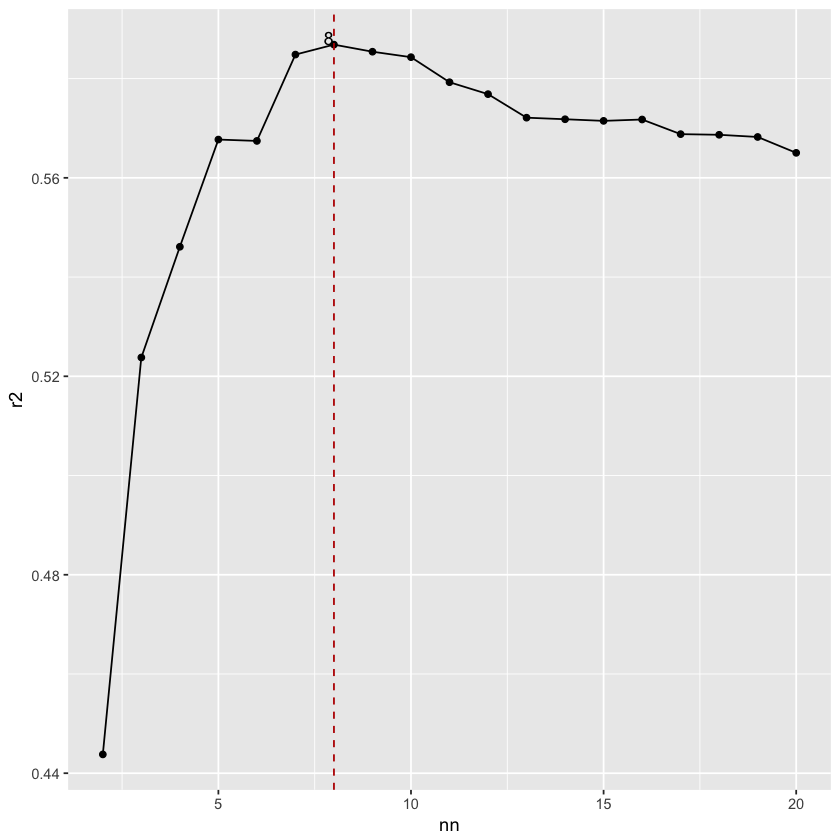

In [9]:
my_knn_cv <- function(df, response, Nrep, K, nn){
  # Calculating Cross Validation score for K-NN
  # 
  # Args
  # ----------
  #   df (data.frame)
  #   response (str): The response variable
  #   Nrep (int): calculate cv using different partition for Nrep number of times
  #   K (int): number of folds
  #  nn (int): a list contains the nearest neighbor
  # 
  # Returns
  # ----------
  # list
  #    a list records related information about the cross validation result
  apply_dim = ifelse(K==nrow(df),2,1)
  n.models = length(nn) #number of different models to fit
  n = nrow(df)
  y = df[,c(response)]
  yhat=matrix(0,n,n.models) 
  MSE<-matrix(0,Nrep,n.models)
  for (j in 1:Nrep) {
    Ind<-CVInd(n,K)
    for (k in 1:K) {
      train<-as.matrix(df[-Ind[[k]],] %>% select_(paste('-',response,sep=''))) 
      test<-as.matrix(df[Ind[[k]],] %>% select_(paste('-',response,sep='')))
      ytrain<-df[-Ind[[k]], grep(response, colnames(df))]
      
      for (index in 1:length(nn)){
        out<-ann(train,test,nn[index],verbose=F)
        ind<-as.matrix(out$knnIndexDist[,1:nn[index]])
        yhat[Ind[[k]],index]<-apply(ind,apply_dim,function(x) mean(ytrain[x]))
      }

    } #end of k loop
    MSE[j,]=apply(yhat,2,function(x) sum((y-x)^2))/n
  } #end of j loop
  MSEAve<- apply(MSE,2,mean); MSEAve #averaged mean square CV error
  MSEsd <- apply(MSE,2,sd); MSEsd   #SD of mean square CV error
  r2<-1-MSEAve/var(y); r2  #CV r^2

  return(list(best_nn =nn[which.max(r2)],
              best_rmse = sqrt(MSEAve[which.min(MSEAve)]),
              cvsd=MSEsd[which.max(r2)],
              r2df=data.frame(nn, r2)))
}
knn_tune = my_knn_cv(df=isch_df_scaled, response="cost", Nrep=5, K=nrow(isch_df_scaled), nn=seq(2,20)) 

ggplot(data=knn_tune$r2df, aes(x=nn, y=r2)) + 
  geom_point() + 
  geom_line() + 
  geom_vline(xintercept = knn_tune$best_nn, colour="#BB0000", linetype="dashed") + 
  geom_text(aes(label=ifelse(nn==knn_tune$best_nn, nn, "")),hjust=1, vjust=0)

**Solution 2**

In [10]:
knn_tune$best_rmse

[1] 0.5321653

The CV estimate of the prediction error standard deviation shown above

**Solution 3**

In [14]:
scale_new_obs <- function(new_obs, df, response){
  # Scale the features of the new observation using the statistics from the original dataframe
  # 
  # Args
  # ----------
  #   new_obs (data.frame)
  #   df (data.frame): the original data.frame which we get the statistics from
  #   response (str): The response variable for the model
  #
  # Returns
  # ----------
  # data.frame
  #    a scaled data.frame
  
  for (col in colnames(df)){
    if (col!=response){
      mean = mean(df[,c(col)])
      sd = sd(df[,c(col)])
      new_obs[,c(col)] = (new_obs[,c(col)]-mean)/sd
    }
  }
  return(new_obs)
}


predict_knn <- function(train_scaled, test_scaled, nn, response){
  # Predict the response for the test data with single observation
  # 
  # Args
  # ----------
  #   train_scaled: scaled train data.frame
  #   test_scaled: scaled test data.frame
  #   nn: number of nearest neighbors
  #   response: str. The response variable for the model
  #
  # Returns
  # ----------
  # int: the predicted result the new data
  #    
  out<-ann(as.matrix(train_scaled %>% select_(paste('-',response,sep=''))),
         as.matrix(test_scaled %>% select_(paste('-',response,sep=''))),
         nn,
         verbose=F)
  ind<-as.matrix(out$knnIndexDist[,1:nn])
  return(mean(train_scaled[ind,c(response)]))
}

new_obs = data.frame(age=59, gend=0, intvn=10, drugs=0, ervis=3, comp=0, comorb=4, dur=300, cost=0)
new_obs_scaled = scale_new_obs(new_obs, isch_df, "cost")
prediction_knn = predict_knn(isch_df_scaled, new_obs_scaled, knn_tune$best_nn, "cost")
prediction_knn

[1] 3.379489

> **Example 2: Local Polynomial Regression**

This problem involves using kernel methods to predict cost for the ischemic heart disease data. Since the loess() function in R allows at most four predictors, and the ischemic heart disease data involves eight predictors, you will have to choose a good subset of four predictors to work with. From HW2, the best regression tree had the three predictors intvn, comorb, and dur, so these three should probably be in the model. These three also had the smallest P-values from the linear regression fit from HW2 and from the GAM fit in problem 2 above, and the VIFs were all small, so the other larger P-values are not distorted by multicollinearity. The predictor comp had the next smallest P-value in HW2 and in the GAM fit above, but it is discrete, which will cause an error in loess(). So as the fourth predictor for this problem, use ervis, which appears to be the next most relevant predictor from the GAM fit above.

1. Use CV to find the best combination of span and degree (0 for local average, 1 for local linear, and 2 for local quadratic regression) for a kernel method.
2. Use Cp to find the best combination of span and degree (0 for local average, 1 for local linear, and 2 for local quadratic regression) for a kernel method. Is this in agreement with what CV said was the best span and degree?
3. For the optimal model from part (a), what is the CV estimate of the prediction error standard deviation?
4. What is the predicted cost for a person with age=59, gend=0, intvn=10, drugs=0, ervis=3, comp=0, comorb=4, and dur=300?

**Solution 1**

In [16]:
param_grid_loess <- function(df, response, Nrep, K, degree_list, span_list){
  # Get the best parameters from every combination of the input 
  # mtry and nodesize according to OOB R^2 obtained from my_rf_oob function
  #
  # Args
  # ----------
  #   df (data.frame)
  #   response (string): the response variable name
  #   Nrep (num): 
  #       number of replicates of CV. 
  #       Used in order to check the effect of the randomness when doing CV
  #   K (int): number of folds
  #   degree_list (list): a list degree values
  #   span_list (list): a list span values
  #
  # Returns
  # ----------
  # list:
  #    a list containing the cross validation result of MSE in each repetition,
  #    the best number of degree and span

  num_columns = length(degree_list)*length(span_list)
  EvaMat<-matrix(0,Nrep,num_columns)
  iterator = 1
  
  for(d in degree_list){
    for(s in span_list){
      EvaMat[,iterator] = cv_loess(df, 
                               response=response,
                               Nrep=Nrep, 
                               K=K,
                               degree=d,
                               span=s
      )
      iterator= iterator +1
    }
  }
  EvaMatAve<- apply(EvaMat,2,mean)
  best_param = get_param_value(EvaMatAve, degree_list, span_list, max=FALSE)
  
  return(list(matrix=EvaMat,
              degree=best_param$outer,
              span=best_param$inner))
}

cv_loess <- function(df, response, Nrep, K, degree, span){
  # Run Cross validation using the indicated parameters
  #
  # Args
  # ----------
  #   df (data.frame)
  #   response (str): the response variable name
  #   Nrep (int)
  #       number of replicates of CV. 
  #       Used in order to check the effect of the randomness when doing CV.
  #   K (int): K-fold CV on each replicate
  #   degree (int): the degree of the polynomials to be used, normally 1 or 2
  #   span (num): he parameter alpha which controls the degree of smoothing.
  #
  # Returns
  # --------
  #    result of MSE in each repetition. 
  #    If Nrep=10, then the output will be with dimension 10*1
  #
  # Note
  # --------
  # When the fit was made using surface = "interpolate" (the default), 
  # predict.loess will not extrapolate – so points outside an axis-aligned 
  # hypercube enclosing the original data will have missing (NA) predictions 
  # and standard errors. Therefore, I added control=loess.control(surface="direct") 
  # in the loess function. 
  # Reference (https://stackoverflow.com/questions/27796368/r-loess-prediction-returns-na)
  
  #Nrep<-3 #number of replicates of CV
  #K<-3  #K-fold CV on each replicate
  fm = as.formula(paste(response,'~.',sep=''))
  n=nrow(df)
  y<-df[,c(response)]
  yhat=matrix(0,n) # records the prediction for each model. Each column represent a model, each row represent an observation
  MSE<-matrix(0,Nrep) # 
  
  for (j in 1:Nrep) {
    Ind<-CVInd(n,K)
    for (k in 1:K) {
      out<-loess(fm, df[-Ind[[k]],],degree=degree,span=span, control=loess.control(surface="direct"))
      yhat[Ind[[k]],1]<-predict(out,df[Ind[[k]],])
    } #end of k loop
    MSE[j,]=apply(yhat,2,function(x) sum((y-x)^2))/n
  } #end of j loop

  return(MSE)
  # MSEAve<- apply(MSE,2,mean); MSEAve #ave
}

get_param_value <- function(metrics_list, outer_list, inner_list, max=FALSE){
  # Get the best param according to the index of the calculated metrics_list
  #
  # Parameters
  # ----------
  # metrics_list: list
  #     a list contains the estimated evaluation metrics
  #     should be generated using cross validation. 
  #     Each value is the value for some certain values from 
  #     the combination of outer_list and inner_list
  # outer_list: list, the outer loop when tuning the parameters.
  # inner_list: list, the inner loop when tuning the parameters.
  # max: bool, indicate whether we want max or min value from the metrics_list
  #
  # Returns
  # ----------
  # list
  #    a list shows the value of outer and inner that generates the lowest average metrics
  
  if (max==FALSE){
    targer_number = which.min(metrics_list)  
  }else{
    targer_number = which.max(metrics_list)  
  }
  
  
  outer_index = ceiling(targer_number/length(inner_list))
  inner_index = targer_number%%length(inner_list)
  if(inner_index==0){
    inner_index=length(inner_list)
  }
  
  return(list(outer=outer_list[outer_index],
              inner=inner_list[inner_index]))
}

In [32]:
param_tune_loess = param_grid_loess(df=isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
                                     response="cost", 
                                     Nrep=5, 
                                     K=10, 
                                     degree_list=c(0,1,2), 
                                     span_list=seq(0.1,0.7,0.1))

In [23]:
MSEAve<- apply(param_tune_loess$matrix,2,mean); MSEAve #averaged mean square CV error

# tune all the combination of the parameters. The one with the smallest mean MSE is 
# the one we use for our final model. Therefore, we use pick the minimum MSE as the 
# one to calculate the final r-squared.
minMSEAve = MSEAve[which.min(MSEAve)]
kernal_best_rmse = sqrt(minMSEAve)
minMSEsd <- sd(param_tune_loess$matrix[,which.min(MSEAve)]); minMSEsd   #SD of mean square CV error
y<-isch_df_scaled$cost
r2_loess_cv<-1-minMSEAve/var(y); r2_loess_cv #CV r^2

[1] 0.2271935 0.2422512 0.2599671 0.2793975 0.2981858 0.3174634 0.3399112
 [8] 0.2279342 0.2197893 0.2206144 0.2202432 0.2210909 0.2226562 0.2252195
[15] 0.2972706 0.2482372 0.2328184 0.2256806 0.2267962 0.2252901 0.2235721

[1] 0.003288389

[1] 0.679356

In [24]:
print(paste("degree: ",param_tune_loess$degree))
print(paste("span: ",param_tune_loess$span))
print(paste("The cross validation r^2 is",r2_loess_cv))

[1] "degree:  1"
[1] "span:  0.2"
[1] "The cross validation r^2 is 0.679356049470728"


**Solution 2**

In [33]:
##### For degree = 0

##first find sigma_hat for a low-bias model###
for (lambda in seq(.01,.2,.01)) {
  out<-loess(cost ~.,
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=0,
             span=lambda)
  print(c(lambda,out$s))
}
sig_hat_0<-0.4844904

##now find Cp for various lambda###
for (lambda in c(seq(.01,.05,.01), seq(.1,0.9,.1))) {
  out<-loess(cost ~.,
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=0,
             span=lambda)
  SSE<-sum((isch_df_scaled[,c("cost")]-out$fitted)^2)
  Cp <- (SSE+2*out$trace.hat*sig_hat_0^2)/nrow(isch_df_scaled)
  print(c(lambda,Cp))
}

# -> the minimum Cp is 0.2434139 when span=0.04

##### For degree = 1

##first find sigma_hat for a low-bias model###
for (lambda in seq(.02,.2,.01)) {
  out<-loess(cost ~., 
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=1, 
             span=lambda)
  print(c(lambda,out$s))
}
sig_hat_1<-0.4908207

##now find Cp for various lambda###
for (lambda in c(seq(.01,.05,.01), seq(.1,0.9,.1))) {
  out<-loess(cost ~., 
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=1, 
             span=lambda)     
  SSE<-sum((isch_df_scaled[,c("cost")]-out$fitted)^2)
  Cp <- (SSE+2*out$trace.hat*sig_hat_1^2)/nrow(isch_df_scaled) 
  print(c(lambda,Cp))
}

# -> the minimum Cp is 0.2249555 when span=0.5


##### For degree = 2

##first find sigma_hat for a low-bias model###
for (lambda in seq(.02,.2,.01)) {
  out<-loess(cost ~., 
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=1, 
             span=lambda)
  print(c(lambda,out$s))
}
sig_hat_2<-0.4908207

##now find Cp for various lambda###
for (lambda in c(seq(.01,.05,.01), seq(.1,0.9,.1))) {
  out<-loess(cost ~., 
             isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
             degree=2, 
             span=lambda)     
  SSE<-sum((isch_df_scaled[,c("cost")]-out$fitted)^2)
  Cp <- (SSE+2*out$trace.hat*sig_hat_2^2)/nrow(isch_df_scaled) 
  print(c(lambda,Cp))
}

# -> the minimum Cp is 0.243059 when span=0.6

[1] 0.0100000 0.5857457
[1] 0.0200000 0.4844904
[1] 0.0300000 0.4813961
[1] 0.0400000 0.4821727
[1] 0.050000 0.485394
[1] 0.0600000 0.4886634
[1] 0.0700000 0.4935487
[1] 0.0800000 0.4960235
[1] 0.0900000 0.4978843
[1] 0.1000000 0.5017093
[1] 0.1100000 0.5133619
[1] 0.1200000 0.5183665
[1] 0.1300000 0.5210468
[1] 0.1400000 0.5279226
[1] 0.1500000 0.5304162
[1] 0.1600000 0.5343597
[1] 0.1700000 0.5387402
[1] 0.1800000 0.5492153
[1] 0.190000 0.549971
[1] 0.2000000 0.5588878
[1] 0.0100000 0.3453579
[1] 0.0200000 0.2512106
[1] 0.0300000 0.2450885
[1] 0.0400000 0.2434139
[1] 0.0500000 0.2450083
[1] 0.1000000 0.2559631
[1] 0.2000000 0.3133664
[1] 0.3000000 0.3592462
[1] 0.400000 0.422737
[1] 0.5000000 0.4451276
[1] 0.6000000 0.4954951
[1] 0.7000000 0.5055208
[1] 0.8000000 0.5281851
[1] 0.9000000 0.5436618
[1] 0.0200000 0.7217457
[1] 0.0300000 0.5202146
[1] 0.0400000 0.4908207
[1] 0.05000 0.47997
[1] 0.060000 0.477706
[1] 0.0700000 0.4764831
[1] 0.0800000 0.4696464
[1] 0.090000 0.466708
[1] 0.

The best span and degree obtained using Cp is 

* degree = 1
* span = 0.5

**Solution 3**

In [26]:
kernal_best_rmse

[1] 0.4688169

The CV estimate of the prediction error standard deviation is shown above

**Solution 4**

In [29]:
out<-loess(cost~., 
           isch_df_scaled %>% select(intvn, comorb, dur, ervis, cost),
           degree=param_tune_loess$degree,
           span=param_tune_loess$span)
prediction_loess = predict(out, newdata = new_obs_scaled)
prediction_loess

1 
3.54746